In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data import

In [211]:
df = pd.read_csv('heart.csv')
#import csvdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Inspecting data shape

In [212]:
print('Dimensions of data: ', df.shape)

Dimensions of data:  (918, 12)


### Checking if any missing values

In [213]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Inspecting data types

In [214]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Features distribution

In [215]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
cat_cols = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']

#### Numerical features

In [216]:
#Statistical metrics 
df[num_cols].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


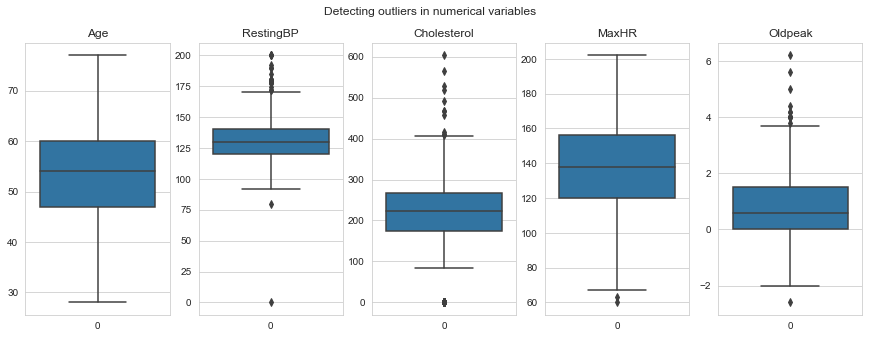

In [295]:
#detecting outliers with boxplots
plt.figure(figsize = (15,5))
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(data = df[num_cols[i]])
    plt.title(num_cols[i])
plt.suptitle('Detecting outliers in numerical variables');
    
#Except for Age, all other numerical columns show outliers that may need to be processed

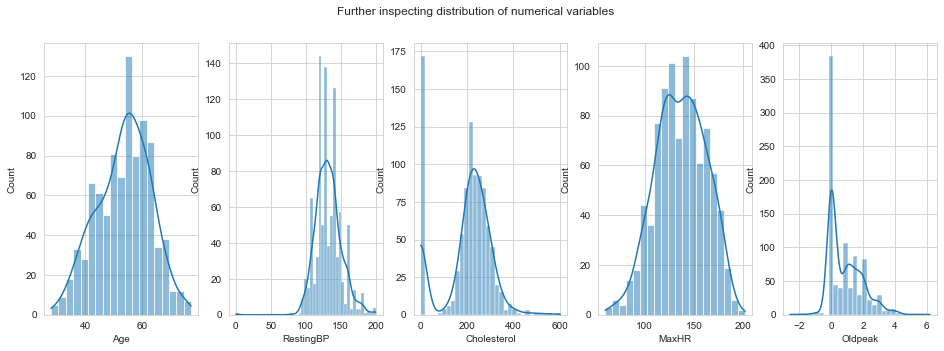

In [292]:
#Checking the linearity with KDE curves
plt.figure(figsize = (16,5))
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.histplot(df[num_cols[i]],kde=True) 
plt.suptitle('Further inspecting distribution of numerical variables');
#All features (disregarding outliers in Choleterol) except Oldpeak show a largely normal distribution. 
#OldPeak is positively skewed.

#### Categorical features

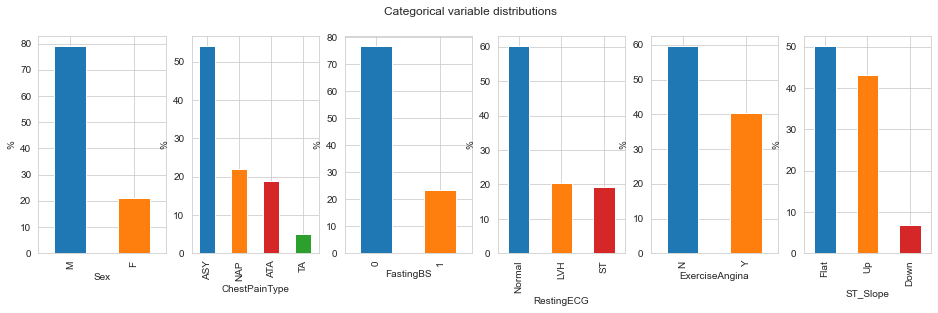

In [304]:
#Checking how categories are distributed in each categorical feature
plt.figure(figsize = (16,4))
for i in range(len(cat_cols)):
    plt.subplot(1,len(cat_cols),i+1)
    (df.value_counts(cat_cols[i])/df.shape[0]*100).plot.bar(color = ['tab:blue','tab:orange','tab:red','tab:green'])
    plt.ylabel('%')
plt.suptitle('Categorical variable distributions');

### Target variable (heart disease) distribution

% of heart disease in data: 55.34%
% of no heart disease in data: 44.66%


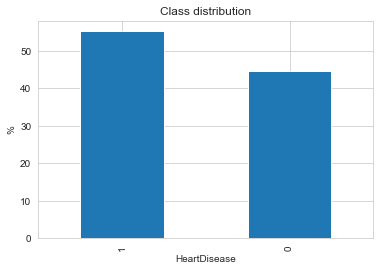

In [306]:
print('% of heart disease in data: {:.2f}%'.format(df.value_counts('HeartDisease').loc[1]/df.shape[0]*100))
print('% of no heart disease in data: {:.2f}%'.format(df.value_counts('HeartDisease').loc[0]/df.shape[0]*100))

(df.value_counts('HeartDisease')/df.shape[0]*100).plot.bar()
plt.title('Class distribution')
plt.ylabel('%');

#There is a slight class imbalance 

### Interactions between target variable and features

#### Target variable vs numerical features

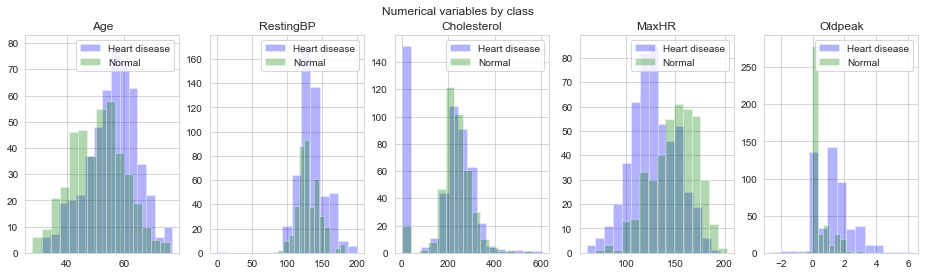

In [307]:
plt.figure(figsize = (16,4))
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    plt.hist(df[df["HeartDisease"]==1][num_cols[i]], bins=15, alpha=0.3, color="blue", label="Heart disease")
    plt.hist(df[df["HeartDisease"]==0][num_cols[i]], bins=15, alpha=0.3, color="green", label="Normal")
    plt.title(num_cols[i])
    plt.legend()
plt.suptitle('Numerical variables by class');

#### Target variable vs categorical features

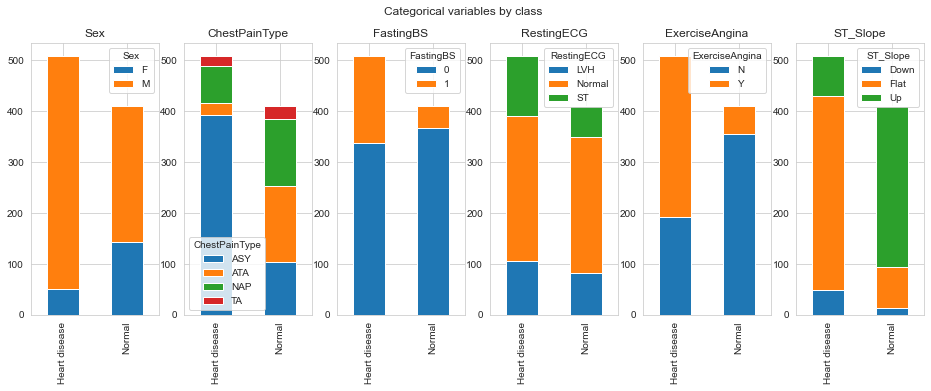

In [308]:
fig, axes = plt.subplots(figsize = (16,5), nrows=1, ncols=len(cat_cols))

for i in range(0,len(cat_cols)):
    subdf_1 = pd.Series(df_copy[df_copy.HeartDisease==1].groupby(cat_cols[i]).count()['HeartDisease'],
                        name = 'Heart disease')
    subdf_2 = pd.Series(df_copy[df_copy.HeartDisease==0].groupby(cat_cols[i]).count()['HeartDisease'], 
                        name = 'Normal')
    subdf = pd.DataFrame([subdf_1, subdf_2])
    subdf.plot.bar(stacked = True, ax = axes[i], title = cat_cols[i])
plt.suptitle('Categorical variables by class');